<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_Project_2/blob/main/MLproject_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project
1. The objective of this project is to classify whether someone has diabetes or not.
2. Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
3. The independent variables in this data set are :-'Age', 'gender','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'.
4. The value of outcome variable 'diabetes' is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

---
* This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.
---



# Importing Libraries & Dataset

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import sklearn

%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

print("Setup Complete")

Setup Complete


About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. ✈

Importing dataset from Google Drive

In [41]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [42]:
data.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
86720,Male,41.0,0,0,current,26.04,6.5,126,0
85334,Female,80.0,1,1,never,26.57,6.2,160,0
419,Female,34.0,0,0,never,21.30,6.1,130,0


In [43]:
data.shape

(100000, 9)

In [44]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [46]:
data['age'].describe().T

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

# Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.
* Outlier detection by visualization
* Outlier removal

In [47]:
data.duplicated().sum()

3854

In [48]:
data.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Duplicate & Null removal

As in this dataset, there is identification column, so it is not possible to detect duplicate rows.

In [49]:
#check for missing values, count them and print the sum for every column
data.isnull().sum() #conclusion :- there are no null values in this dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Interpretation: There are no duplicate or Null values in the dataset.

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [51]:
# Data_types, unique_values, value_counts of all columns
a = []
b = []
c = []
d = []
for col in data:
    a.append(col)
    b.append(data[col].dtype)
    c.append(data[col].nunique())
    d.append(data[col].value_counts())
pd.DataFrame({'column':a,'type': b ,'unique value' : c,'value_counts':d})

,column,type,unique value,value_counts
0,gender,object,3,Female 58552 Male 41430 Other 1...
1,age,float64,102,80.00 5621 51.00 1619 47.00 1574 48.0...
2,hypertension,int64,2,"0 92515 1 7485 Name: hypertension, dtyp..."
3,heart_disease,int64,2,"0 96058 1 3942 Name: heart_disease, dty..."
4,smoking_history,object,6,No Info 35816 never 35095 form...
5,bmi,float64,4247,27.32 25495 23.00 103 27.12 101 2...
6,HbA1c_level,float64,18,6.6 8540 5.7 8413 6.5 8362 5.8 832...
7,blood_glucose_level,int64,18,130 7794 159 7759 140 7732 160 771...
8,diabetes,int64,2,"0 91500 1 8500 Name: diabetes, dtype: i..."


## Checking binary features

In [52]:
# Checking binary features (hypertension, heart_disease, and diabetes)
display(data.gender.value_counts())
print()
display(data.hypertension.value_counts())
print()
display(data.heart_disease.value_counts())
print()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

0    92515
1     7485
Name: hypertension, dtype: int64

0    96058
1     3942
Name: heart_disease, dtype: int64

Interpretation: We checked the minimum value of binary columns is 0 and maximum is 1.

In [53]:
# Remove 'Other' values from gender column
t = data['gender'] == 'Other'
data = data[~t]

## Outlier Detection

Boxplot

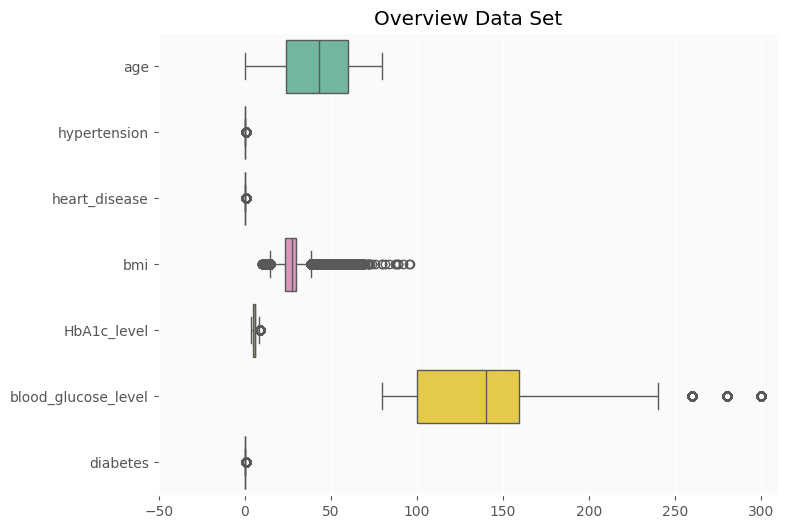

In [54]:
#Boxplot
plt.style.use('ggplot') # Using ggplot2 style visuals
f, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-50, 310))
plt.title("Overview Data Set")
ax = sns.boxplot(data = data,
  orient = 'h',
  palette = 'Set2')
plt.savefig('1') 	#To save the figure

Old Shape:  (99982, 9)



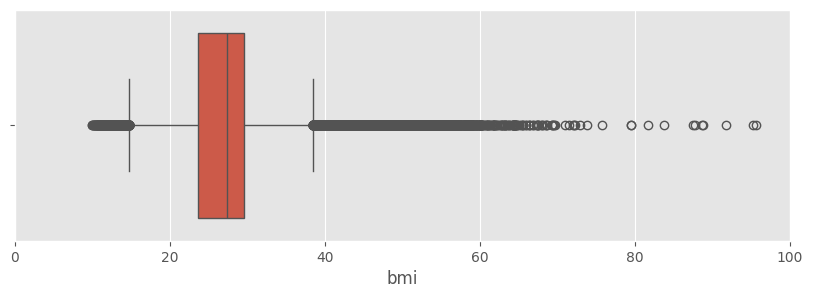

In [55]:
#BoxPlot of Bmi
print("Old Shape: ", data.shape)
print()
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
#plt.title("Bmi with Outliers", fontsize=10)
plt.show()


New Shape:  (92897, 9)



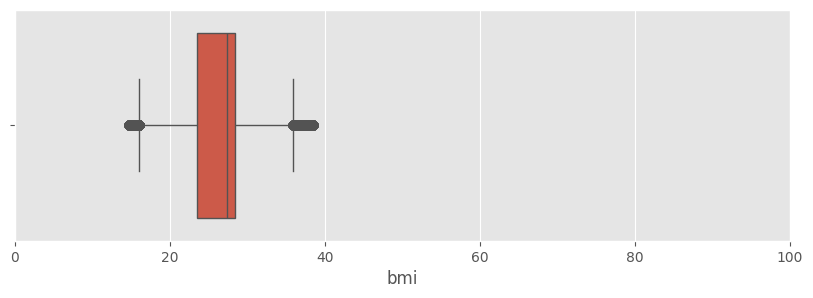

In [56]:
# # Outlier removal of bmi (as we see we have many outliers from visualization, we want to remove it)
# 1. frist calculation IQR
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['bmi'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['bmi'] <= upper_boundry]
data = data[data['bmi'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Bmi
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
#plt.title('Bmi without Outliers', fontsize  = 10)
plt.show()


New Shape:  (91222, 9)



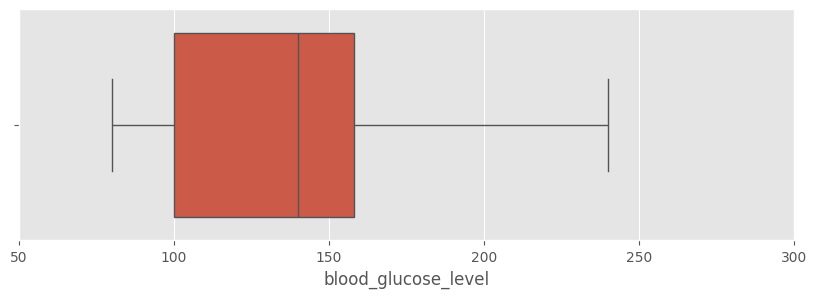

In [57]:
# # Outlier removal of blood_glucose_level
# 1. frist calculation IQR
IQR = data['blood_glucose_level'].quantile(0.75) - data['blood_glucose_level'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['blood_glucose_level'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['blood_glucose_level'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['blood_glucose_level'] <= upper_boundry]
data = data[data['blood_glucose_level'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Blood_glucose_level
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="blood_glucose_level", data=data)
ax.set(xlim=(50, 300))
#plt.title("Blood Glucose Level without Outliers", fontsize=10)
plt.show()

In [58]:
data.shape

(91222, 9)

<Axes: xlabel='blood_glucose_level'>

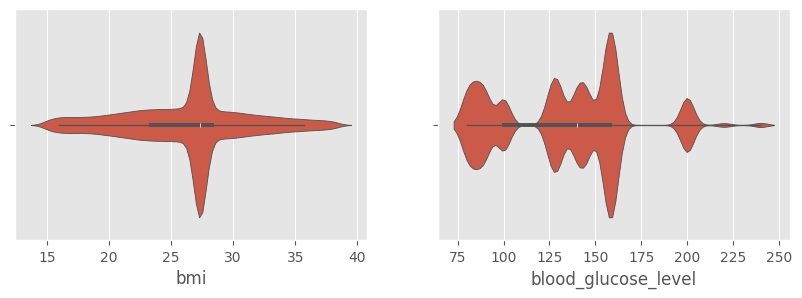

In [59]:
#Boxplot & ViolinPlot of bmi:
plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
sns.violinplot(data = data, x = 'bmi')

plt.subplot(1,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level')

AttributeError: PolyCollection.set() got an unexpected keyword argument 'marker'

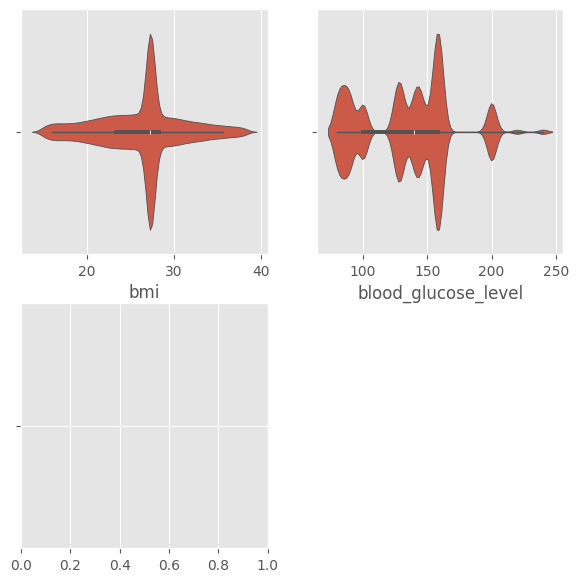

In [60]:
#ViolinPlot of 4 features
plt.figure(figsize = [7,7]);

plt.subplot(2,2,1);
sns.violinplot(data = data, x = 'bmi');

plt.subplot(2,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level');

plt.subplot(2,2,3);
sns.violinplot(data = data, x = 'HbA1c_level',color='green', marker='o');

plt.subplot(2,2,4);
sns.violinplot(data = data, x = 'age',color='blue', marker='o');

# Data Exploration

In [61]:
display(data.columns) #learning about the columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [62]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history'], dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [63]:
# For Data Summarizing, group by 2 Categorical & 2 Numerical variable
data.groupby(['gender', 'smoking_history'])['age', 'bmi'].agg([np.mean, np.median])

age               bmi       
                             mean median       mean median
gender smoking_history                                    
Female No Info          35.308009   33.0  25.144283  27.32
       current          43.072346   43.0  26.932587  27.32
       ever             46.782129   47.0  27.208394  27.32
       former           54.957026   56.0  27.627924  27.32
       never            44.196960   43.0  26.610227  27.32
       not current      47.464448   48.0  26.893340  27.32
Male   No Info          31.736201   26.0  24.771535  27.32
       current          44.854357   45.0  27.549653  27.32
       ever             51.665625   52.0  27.687406  27.32
       former           59.257382   61.0  28.624087  27.60
       never            41.933100   42.0  27.248640  27.32
       not current      47.595452   48.0  27.312593  27.32

In [64]:
# Cross tabulation of 2 Categorical variable with Total
pd.crosstab(data.gender,data.smoking_history,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

smoking_history,No Info,current,ever,former,never,not current,Total
gender,,,,,,,
Female,18247,4557,1992,4142,20515,3503,52956
Male,15155,3867,1600,4064,11258,2322,38266
Total,33402,8424,3592,8206,31773,5825,91222


In [65]:
# groupby of 'gender' column
by_gen= data.groupby('gender')

# mean of every resting ecg type
by_gen.mean()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.192320,0.063411,0.024114,26.253676,5.471565,134.563109,0.050665
Male,40.780338,0.072702,0.054435,26.466322,5.511864,135.294935,0.069618


# Feature Engineering

### Recategorize Smoking_history



In [66]:
# Recategorize
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(data['smoking_history'].value_counts())

non-smoker     65175
past_smoker    17623
current         8424
Name: smoking_history, dtype: int64


### bmi & diabetes

* Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
* it is the weight in kilograms divided by height in meters squared


In [67]:
#bmi counts with %
counts = data.bmi.value_counts()
percs = data.bmi.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
27.32,25142,0.275613
23.00,102,0.001118
27.12,101,0.001107
24.96,100,0.001096
22.40,99,0.001085
...,...,...
24.49,2,0.000022
37.72,2,0.000022
37.92,1,0.000011
38.34,1,0.000011


If BMI	=< 18.5	weight_type is Underweight

If BMI 18.5 – 24.9	weight_type is Normal

If BMI 25 – 29.9	weight_type is Overweight

If BMI >= 30	weight_type is Obesity

Reference: https://www.cdc.gov/diabetes/basics/getting-tested.html

**New Feature 'weight_type'**

In [68]:
#New Categorical feature 'weight_type' a.c.to bmi values
weight_type = []
for value in data['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')
    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')
    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')
    elif (value > 29.9):
        weight_type.append('obesity')
data['weight_type'] = weight_type

### HbA1c_level & diabetes

* A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

* we will create a new feature bassed on the value of (HbA1C)

In [69]:
# Hemoglobin level counts with %
counts = data.HbA1c_level.value_counts()
percs = data.HbA1c_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
6.6,7790,0.085396
5.7,7688,0.084278
6.5,7673,0.084113
5.8,7620,0.083532
6.2,7588,0.083182
6.0,7573,0.083017
6.1,7336,0.080419
3.5,7181,0.078720
4.8,7117,0.078018
4.5,7096,0.077788


**New Feature initial_diagnosis'**

If HbA1c level	< 5.7 initial diagnosis Normal

If HbA1c level	5.7 - 6.4 initial diagnosis Prediabetes

If HbA1c level	>= 6.5 initial diagnosis Diabetes

Reference: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [70]:
#Creating new Categorical feature (initial_diagnosis) based on Numerical feature (HbA1c level)
initial_diagnosis = []
for value in data['HbA1c_level']:
    if value < 5.7:
        initial_diagnosis.append('normal')
    elif (5.7 <= value) and (value <= 6.4):
        initial_diagnosis.append('prediabetes')
    elif (value >= 6.5):
        initial_diagnosis.append('diabetes')

data['initial_diagnosis'] = initial_diagnosis

### blood_glucose_level & diabetes


* If blood_glucose_level	 =< 99	sugar_test is normal
* If blood_glucose_level	 100 – 125	sugar_test is Prediabetes
*If blood_glucose_level	 >= 126	sugar_test is Diabetes

Resources :

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.cdc.gov/diabetes/basics/getting-tested.html

In [71]:
# blood_glucose_level counts with %
counts = data.blood_glucose_level.value_counts()
percs = data.blood_glucose_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
130,7231,0.079268
159,7197,0.078895
126,7190,0.078819
140,7178,0.078687
160,7150,0.078380
145,7142,0.078293
200,7081,0.077624
155,7019,0.076944
80,6675,0.073173
90,6663,0.073042


In [72]:
#New Categorical feature 'sugar_test' a.c.to blood_glucose_level values
sugar_test = []

for value in data['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')

    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')

    elif (value > 125):
        sugar_test.append('diabetes')

data['sugar_test'] = sugar_test

In [73]:
data['sugar_test'].value_counts()

diabetes       64824
normal         19806
prediabetes     6592
Name: sugar_test, dtype: int64

In [74]:
#Crosstab of sugar_test and diabetes
pd.crosstab(data.sugar_test,data.diabetes,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

diabetes,0,1,Total
sugar_test,,,
diabetes,59477,5347,64824
normal,19806,0,19806
prediabetes,6592,0,6592
Total,85875,5347,91222


# Exploratory Data Analysis

## Univariate analysis

In [75]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


1. Gender

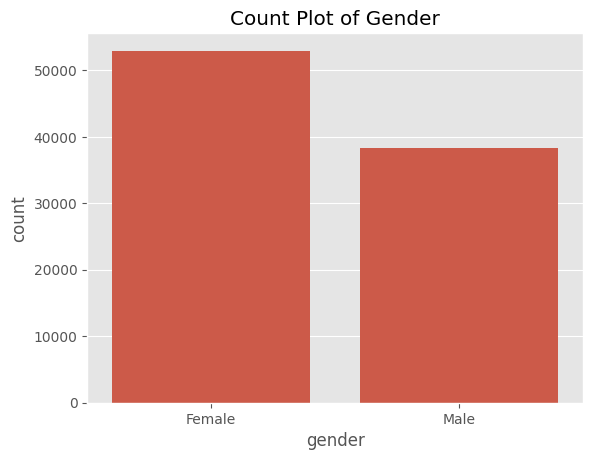

In [76]:
# Gender
ax = sns.countplot(data=data, x='gender')
ax.set(title='Count Plot of Gender')
sns.set(font_scale=0.8)	#To fix the font size of the figure title
sns.set_style("white")	#To fix the background color
sns.set_palette("PuBuGn_d")	#To fix the figure color

2. Smoking history

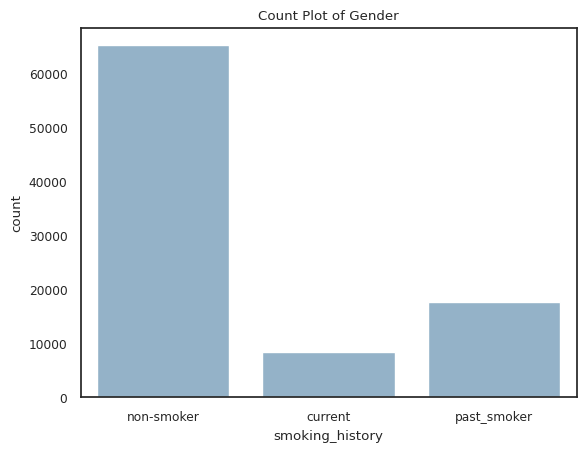

In [77]:
# Smoking_history
ax = sns.countplot(data=data, x='smoking_history')
ax.set(title='Count Plot of Gender')
sns.set(font_scale=0.8)	#To fix the font size of the figure title
sns.set_style("white")	#To fix the background color
sns.set_palette("bright")	#To fix the figure color

3. Weight type

[Text(0.5, 1.0, 'Count Plot of Smoking History')]

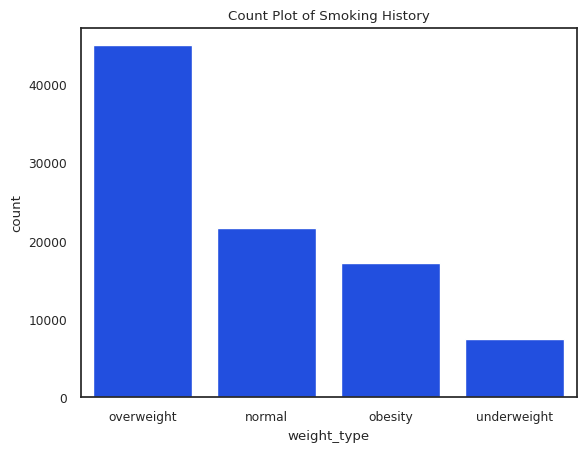

In [78]:
ax = sns.countplot(data=data, x='weight_type')
ax.set(title='Count Plot of Smoking History')

4. Initial diagnoses

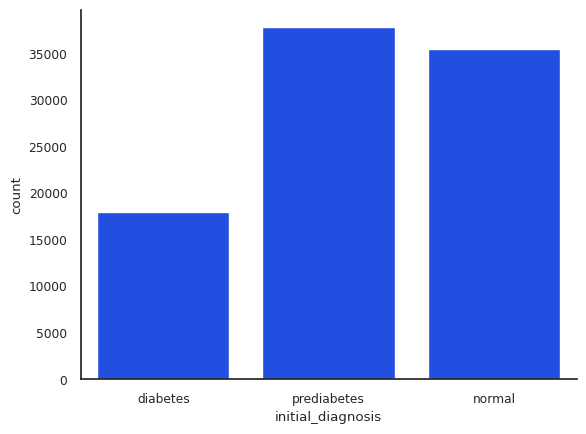

In [79]:
sns.countplot(data=data, x='initial_diagnosis')
#plt(title='Count Plot of Smoking History')
sns.despine()

5. Sugar test

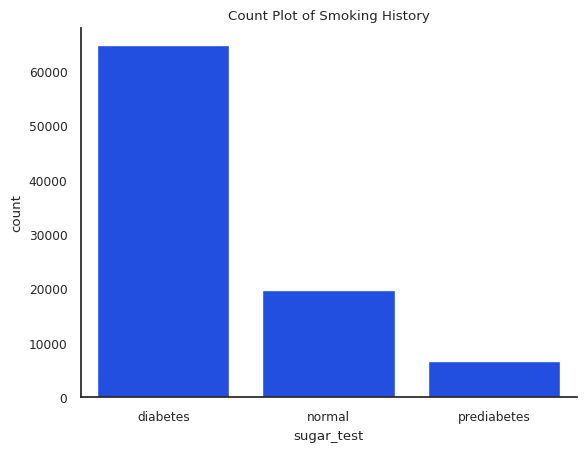

In [80]:
ax = sns.countplot(data=data, x='sugar_test')
ax.set(title='Count Plot of Smoking History')
sns.despine()

### Pie Plot

In [81]:
# Gender visualization
num_var = list(data['gender'].value_counts().values)
labels = list(data['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[52956, 38266]
['Female', 'Male']


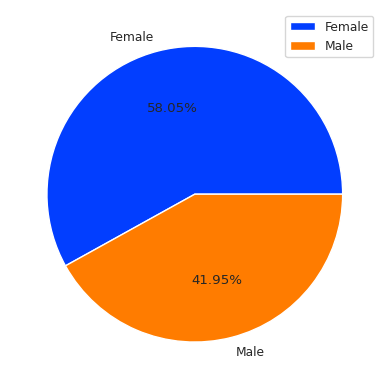

In [82]:
plt.pie(count_dict.values(), labels = ['Female', 'Male'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of records w.r.t gender feature',fontsize=10);

In [84]:
# Number of patients with diabetes
num_var = list(data['diabetes'].value_counts().values)
labels = list(data['diabetes'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[85875, 5347]
[0, 1]


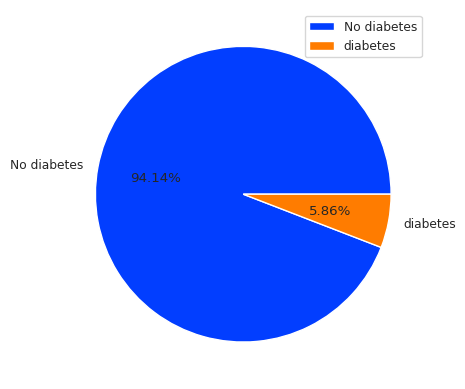

<Figure size 640x480 with 0 Axes>

In [85]:
plt.pie(num_var, labels = ['No diabetes','diabetes'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of patients with diabetes', fontsize=10);

sns.set(font_scale=0.8)	#To fix the font size of the figure title
#plt.title('Correlation with Diabetes')	#To write the figure title
plt.savefig('5') 	#To save the figure
plt.show()

sns.set_style("white")
sns.set_palette("summer_r")
sns.despine()

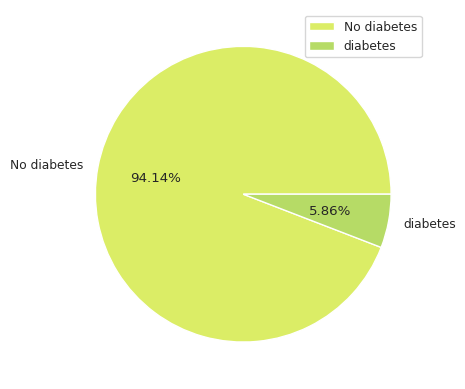

<Figure size 640x480 with 0 Axes>

In [86]:
plt.pie(num_var, labels = ['No diabetes','diabetes'],autopct='%1.2f%%');
plt.legend();
#plt.title('Percentage of patients with diabetes', fontsize=10);

sns.set(font_scale=0.8)	#To fix the font size of the figure title
#plt.title('Correlation with Diabetes')	#To write the figure title
plt.savefig('5') 	#To save the figure
plt.show()

sns.set_style("white")
sns.set_palette("summer_r")
sns.despine()

## Bivariate analysis

* catplot
* scatter
* heatmap
* boxplot
* violinplot

In [87]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


1. Diabetes vs Gender

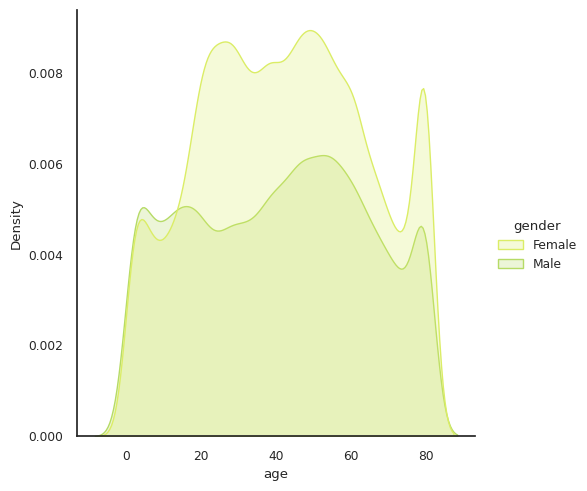

In [88]:
sns.displot(kind='kde', data=data, x='age', hue='gender', fill=True)

2. Diabetes vs Blood glucose level

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

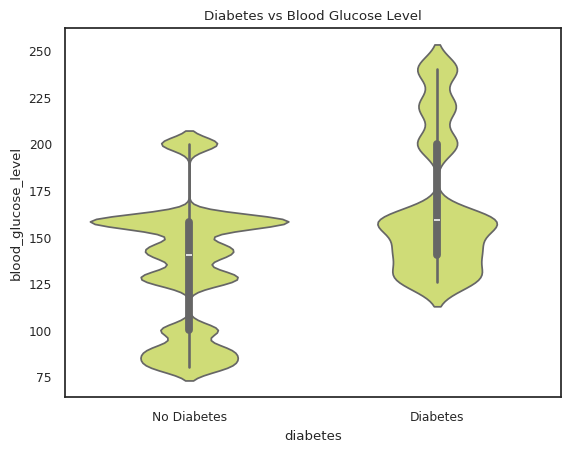

In [89]:
ax = sns.violinplot(data=data, x='diabetes', y='blood_glucose_level')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes']

Conclusion

* with increase in blood glucose level, the chance of diabetes increases
* the people with diabetes have a blood glucose level of around 160 on average

3. Gender vs Blood glucose level

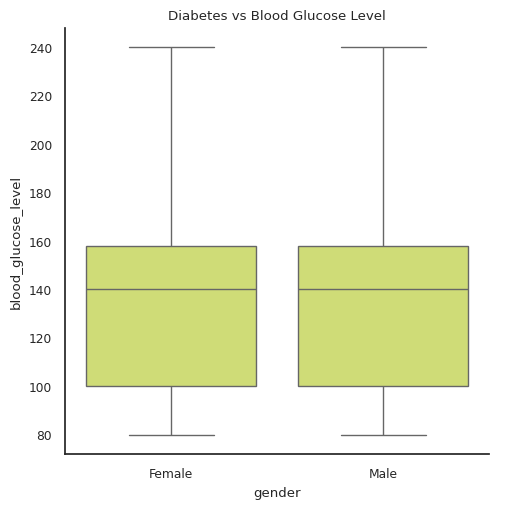

In [90]:
ax = sns.catplot(data=data, x='gender', y='blood_glucose_level', kind='box')
ax.set(title='Diabetes vs Blood Glucose Level')
#ax.set_xticklabels(['No Diabetes', 'Diabetes'])

### Scatter plot

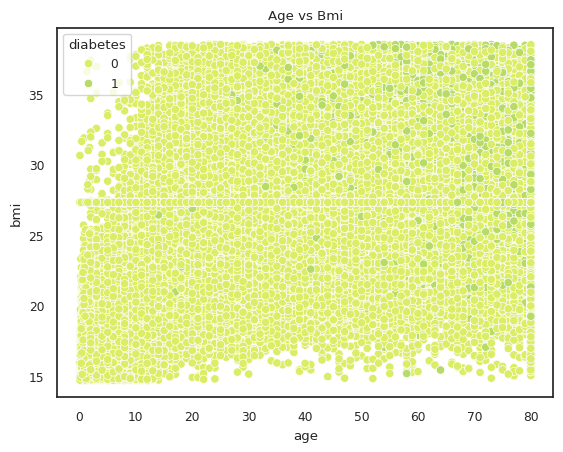

In [91]:
# Scatterplot Age vs BMI colored by Diabetes classification
ax= sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
plt.title('Age vs Bmi')
plt.show()

### Density Plot

Numerical features vs gender

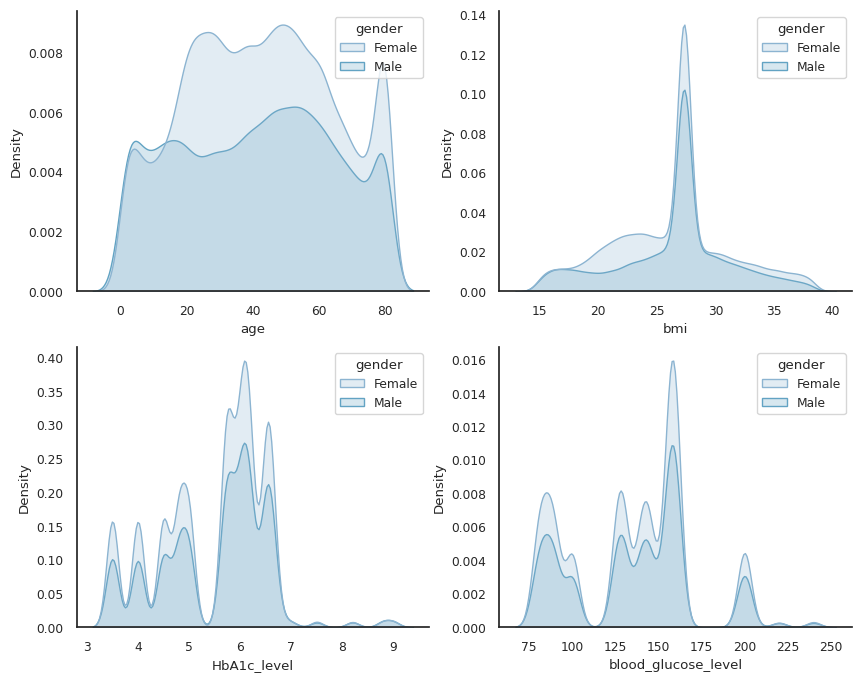

In [92]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='gender')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='gender')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

Numerical features vs diabetes

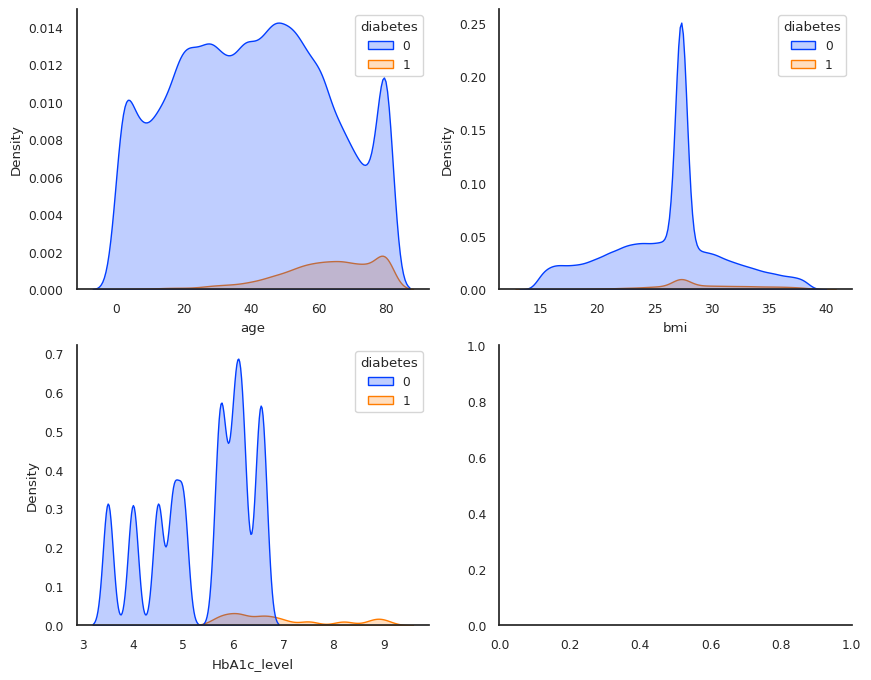

In [94]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='diabetes')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='diabetes')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='diabetes')
#sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='diabetes')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

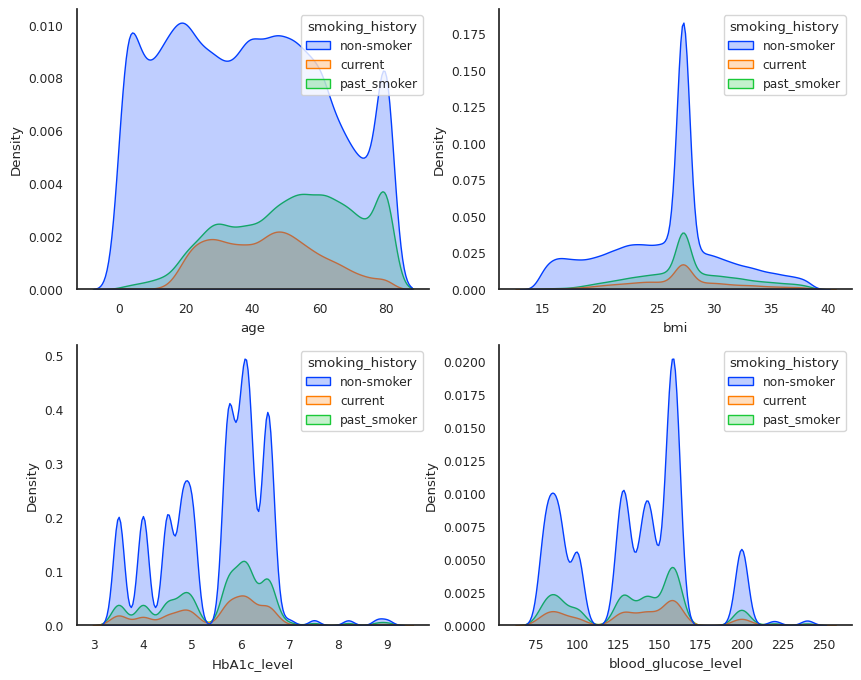

In [95]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='smoking_history')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='smoking_history')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

In [96]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


### Heatmap

<Axes: xlabel='diabetes', ylabel='smoking_history'>

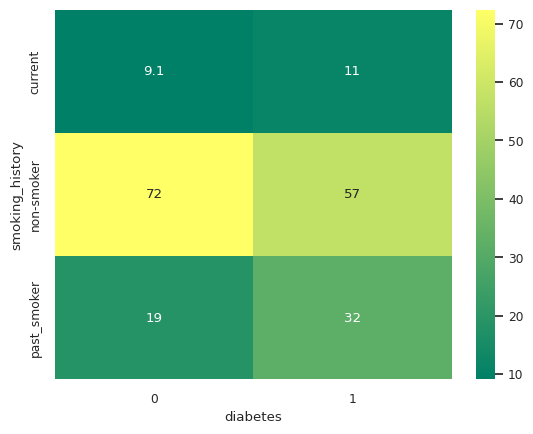

In [97]:
# Smoking history and Gender column
temp_df = pd.crosstab(data['smoking_history'], data['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')

<Axes: xlabel='diabetes', ylabel='gender'>

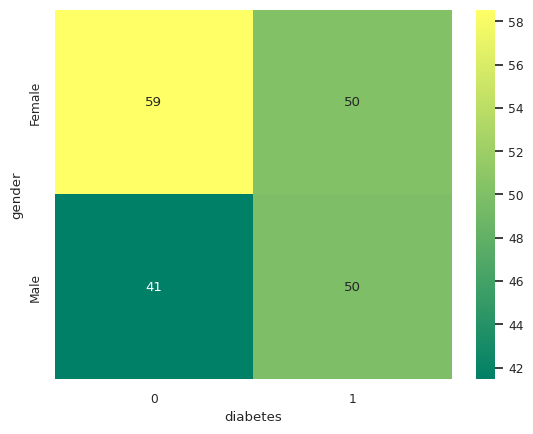

In [98]:
# Diabetes and Gender column
temp_df = pd.crosstab(data['gender'], data['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')

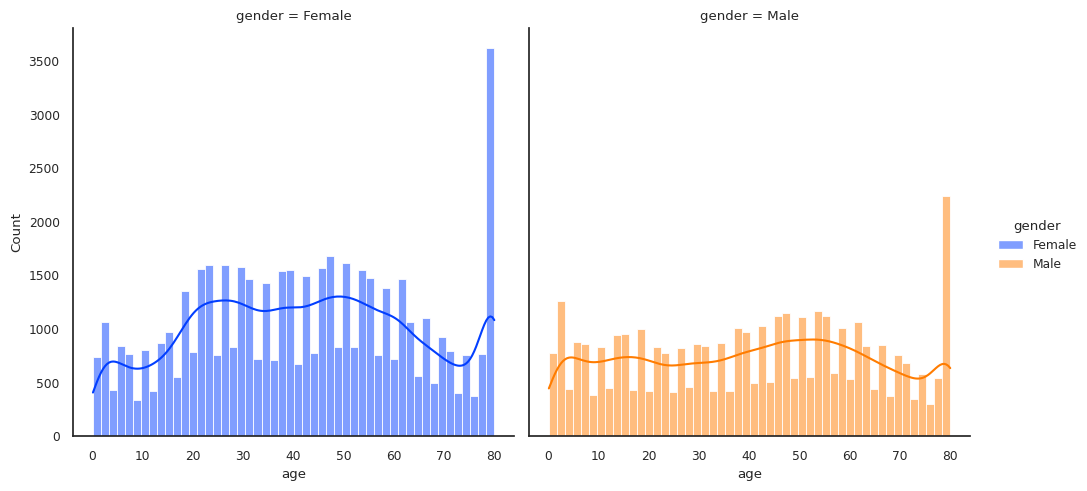

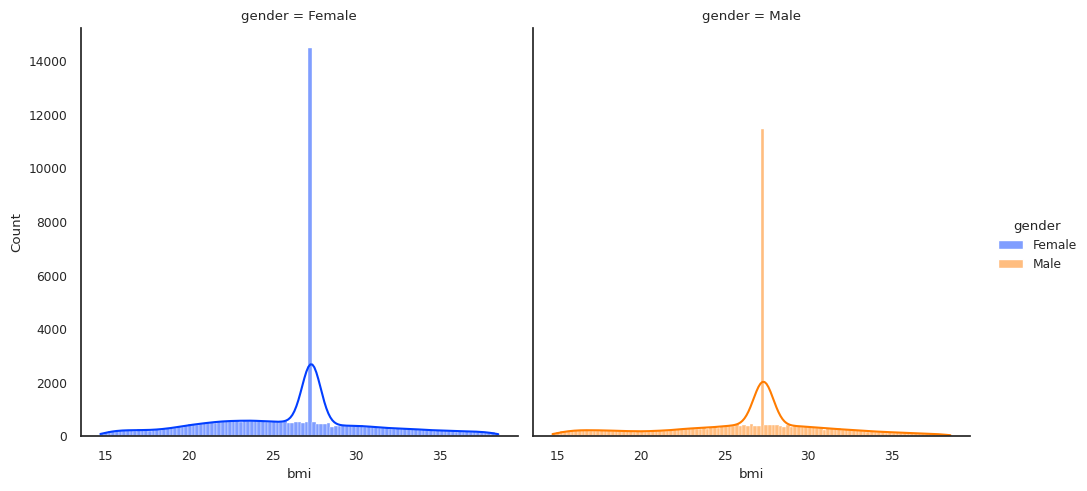

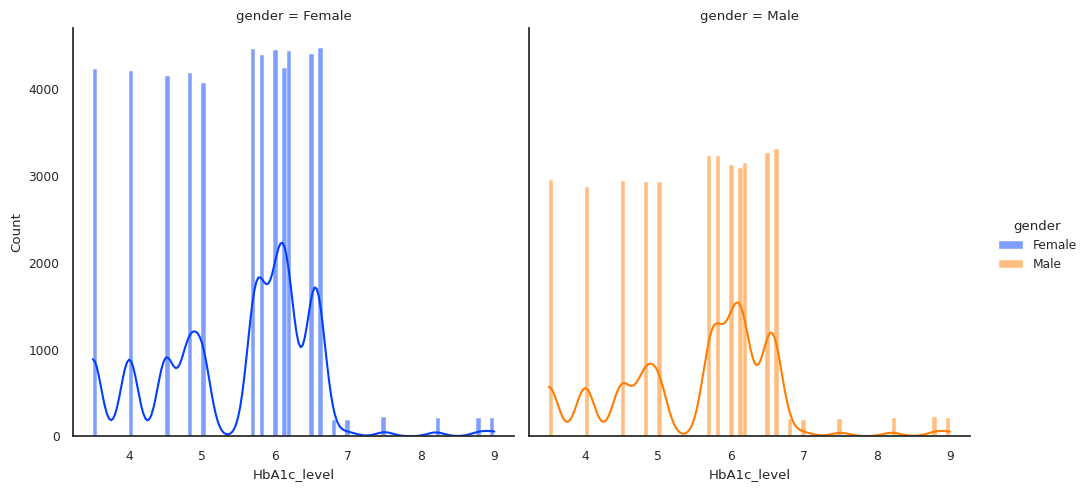

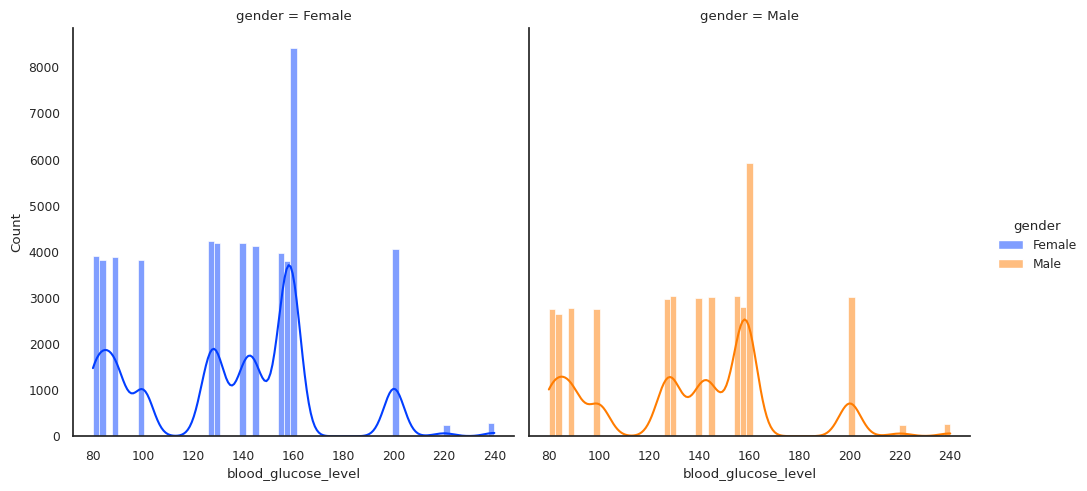

In [99]:
# Distribution Plots by gender
sns.displot(data = data, x='age',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='bmi',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='HbA1c_level',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='blood_glucose_level',hue='gender',col="gender",aspect=1,kde=True)
sns.set_style("white")

sns.set_palette("bright")
sns.despine()

## Multivariate analysis

### Jointplot

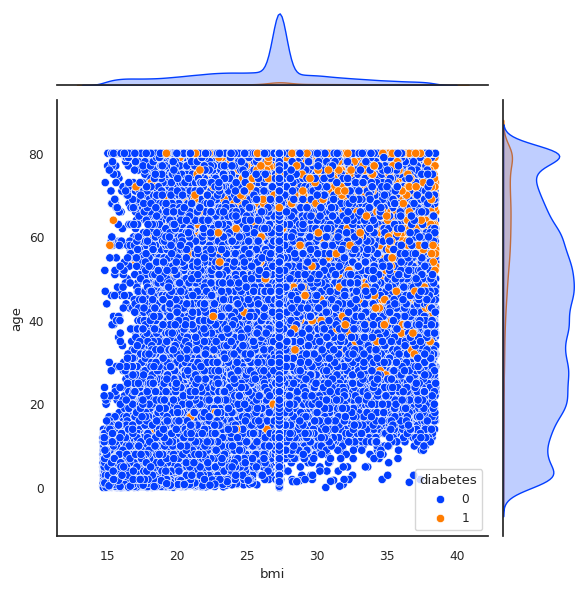

In [100]:
sns.jointplot(data=data, x='bmi', y='age', hue='diabetes', kind='scatter')

In [101]:
# Categorical & Numerical features
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


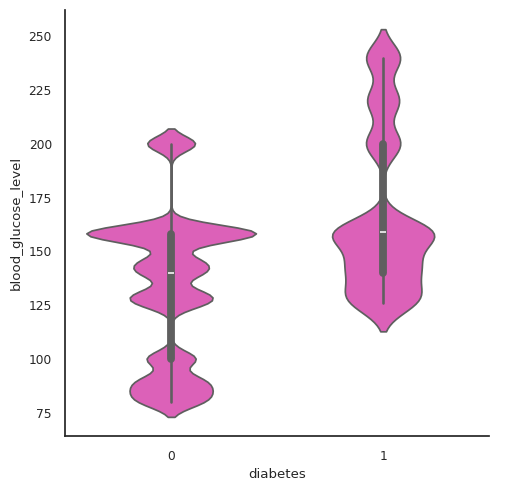

In [102]:
sns.catplot(x='diabetes',
            y='blood_glucose_level',
            data=data,
            kind='violin',
            color = sns.color_palette()[6]);

sns.set_style("white")
sns.set_palette("bright")
sns.despine()

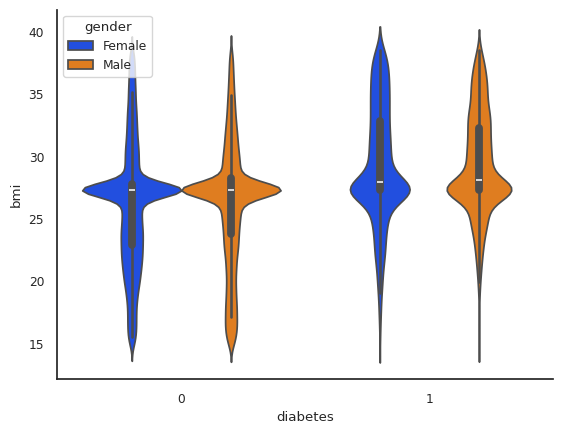

In [103]:
#Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes',
            y='bmi',
            data=data,
            hue='gender');

#sns.set_style("white")
#sns.set_palette("bright")
sns.despine()


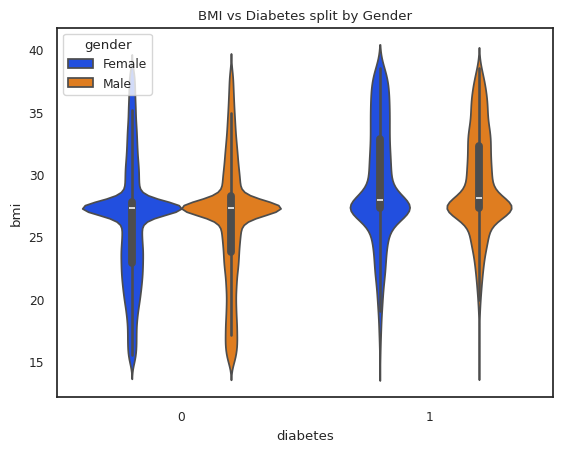

In [104]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', data=data)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

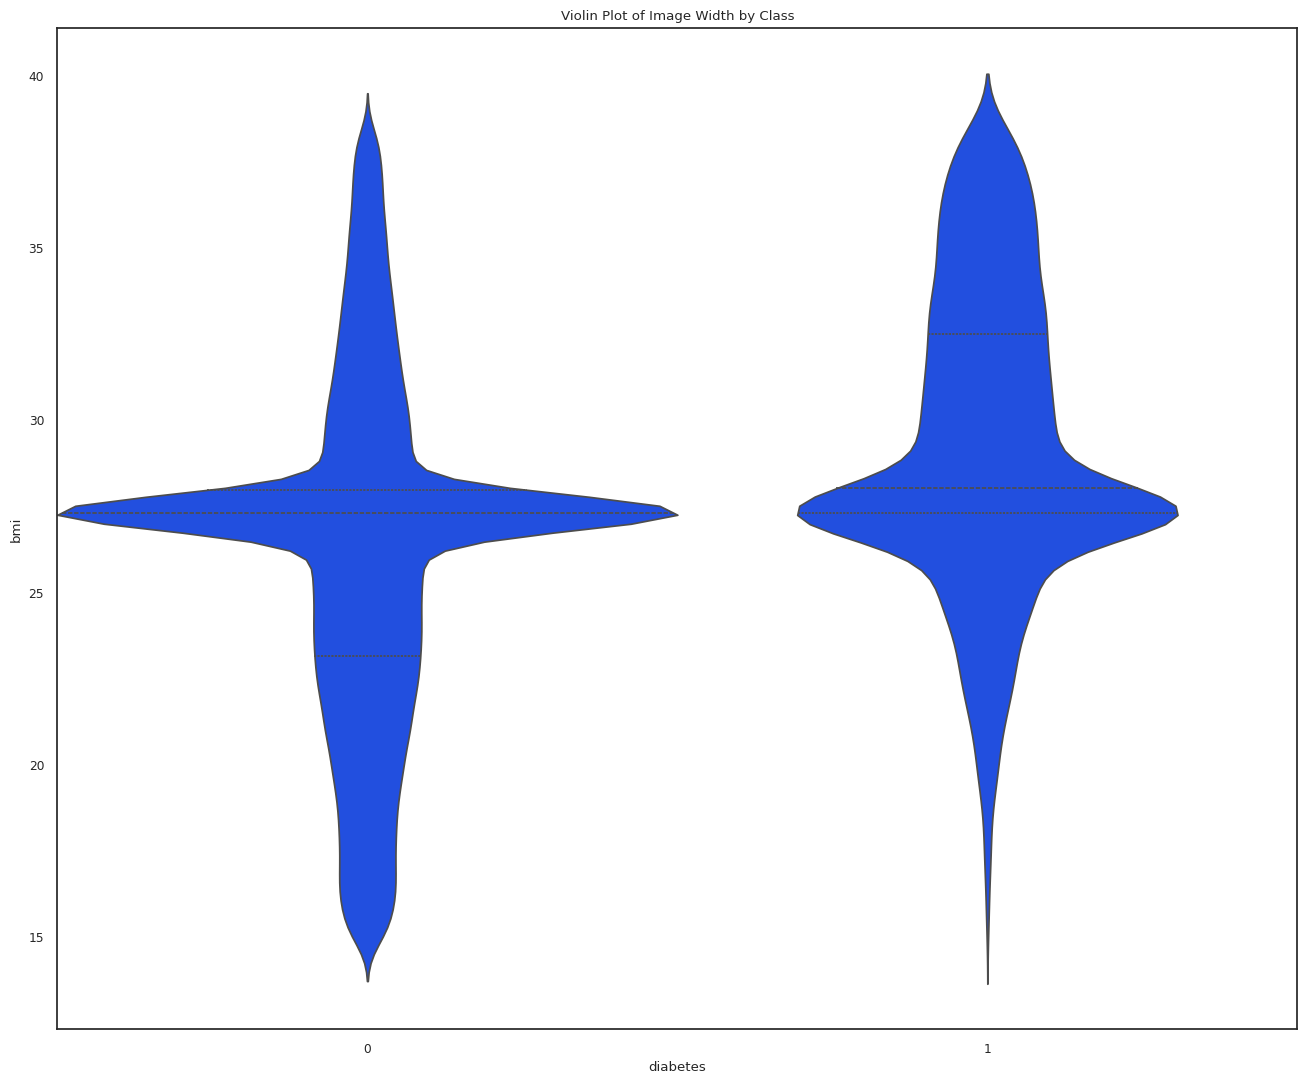

In [105]:
plt.figure(figsize=(16, 13))
sns.violinplot(x="diabetes", y="bmi", data=data,inner="quartile", width=1)
plt.title("Violin Plot of Image Width by Class")
plt.show()


### Heatmap

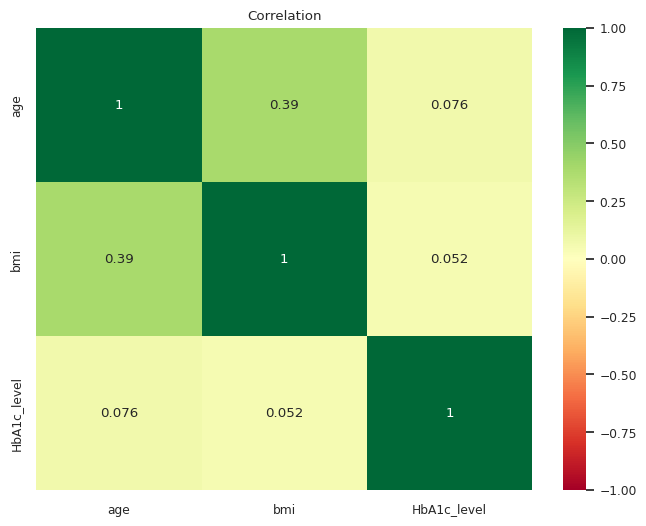

In [106]:
#To check correlation within numerical features
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes('float64').corr(),annot=True,cmap="RdYlGn",vmin = -1, vmax = 1)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation')
plt.show()

<Axes: >

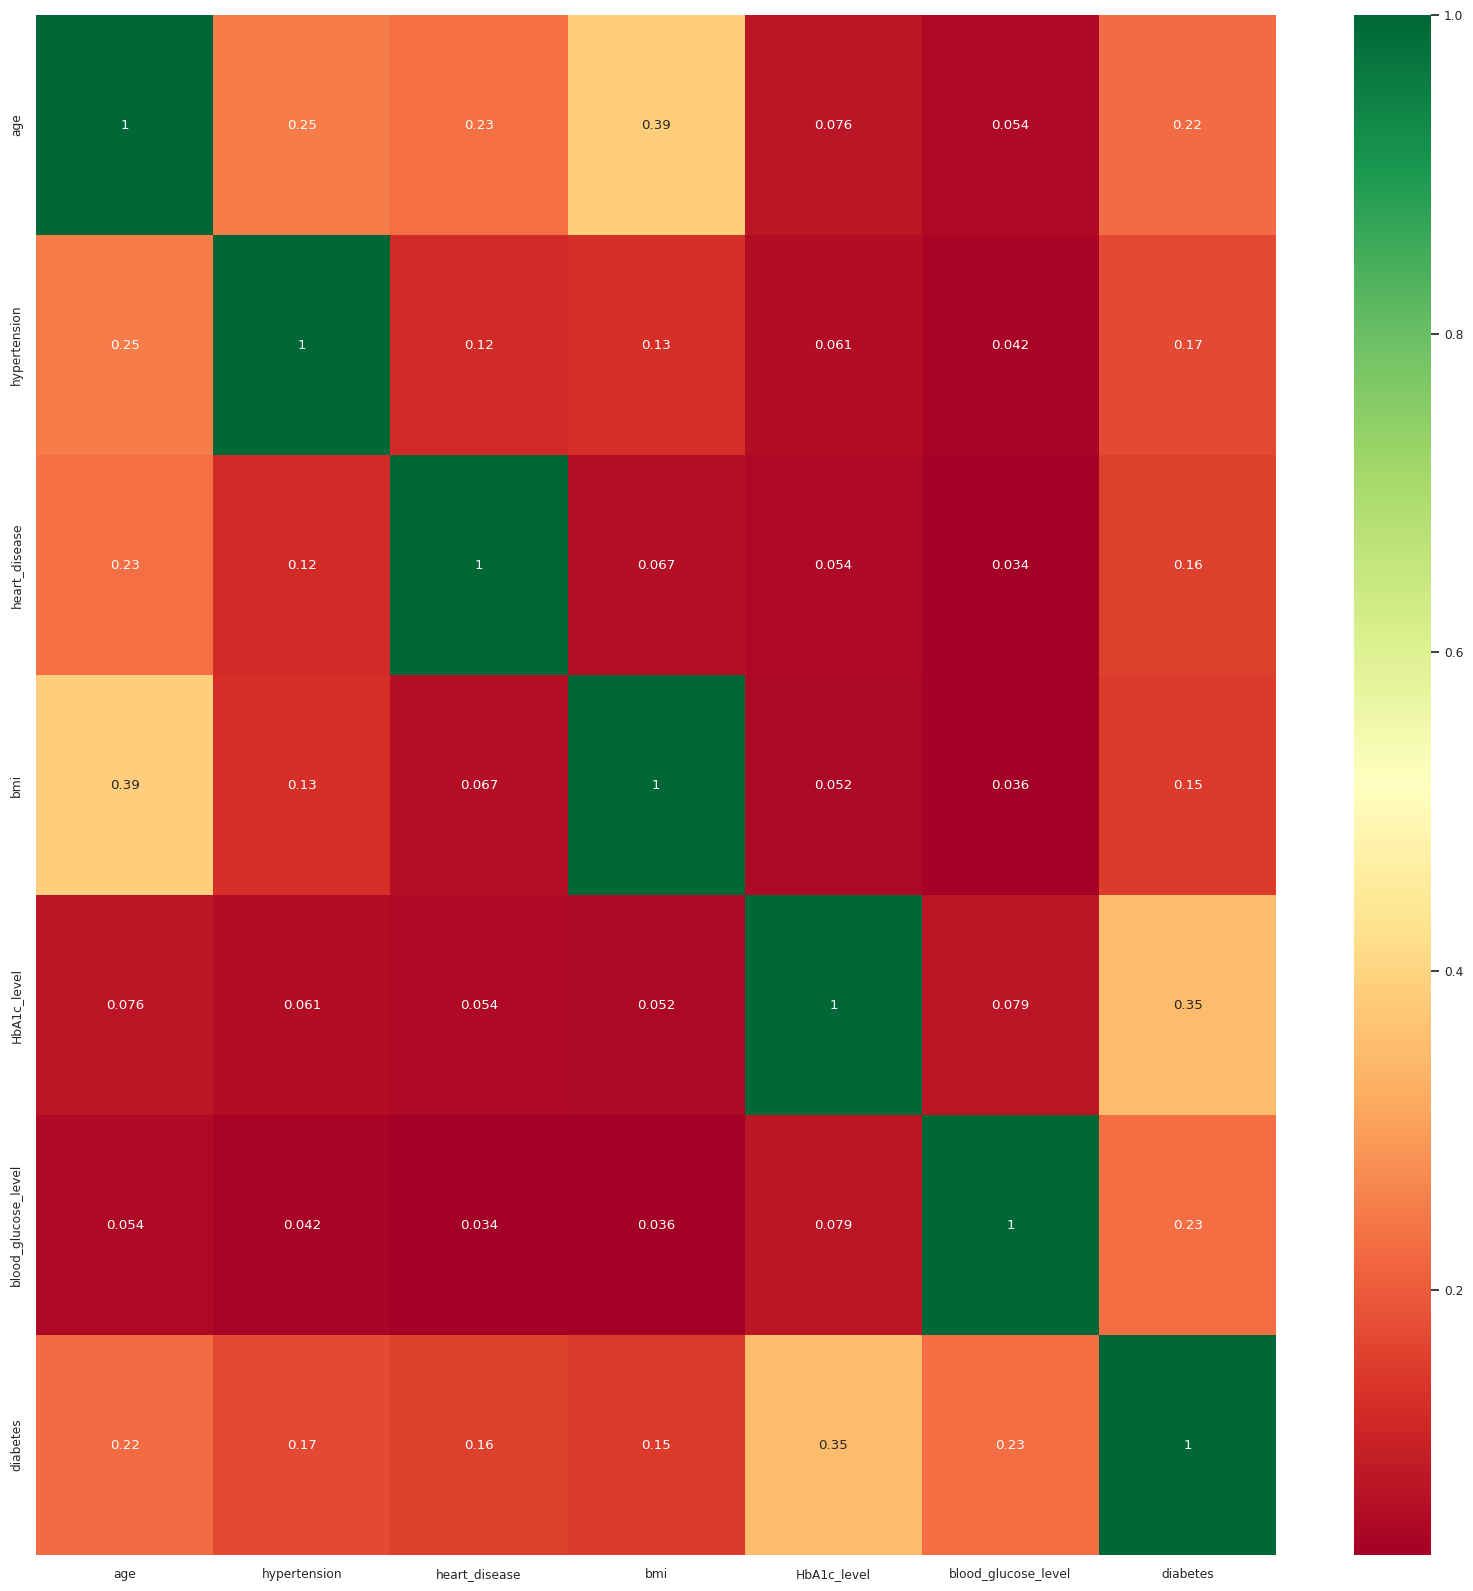

In [107]:
## Correlation within all features
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Pairplot
sns.pairplot(data, hue='diabetes')

In [109]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'weight_type',
       'initial_diagnosis', 'sugar_test'],
      dtype='object')

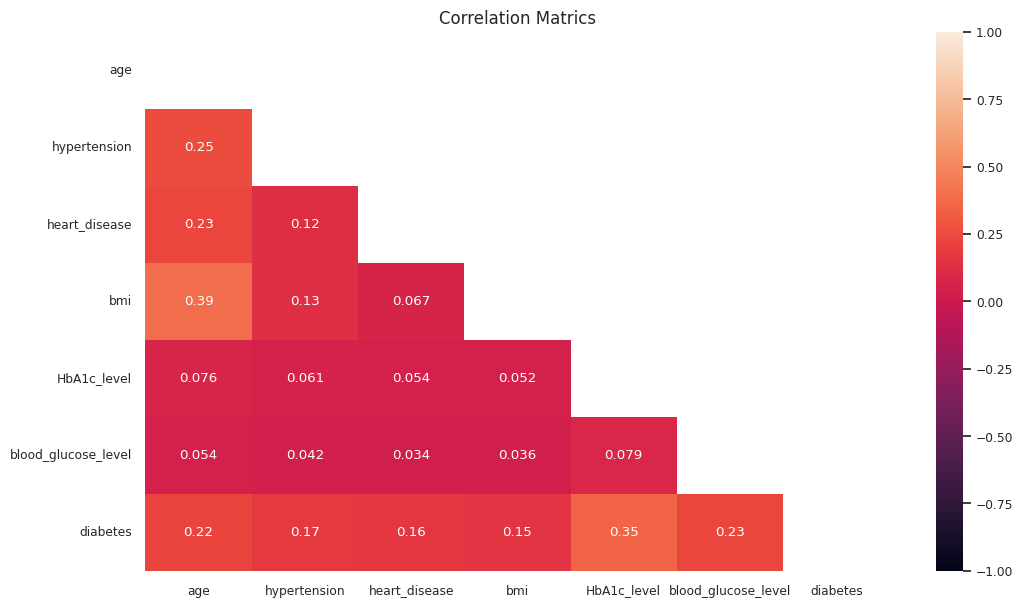

In [110]:
#To check correlation within all columns excluded one column
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.drop(['initial_diagnosis'],axis=1).corr(), annot = True, vmin = -1, vmax = 1,mask=mask)

sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation Matrics')
plt.show()

<Axes: >

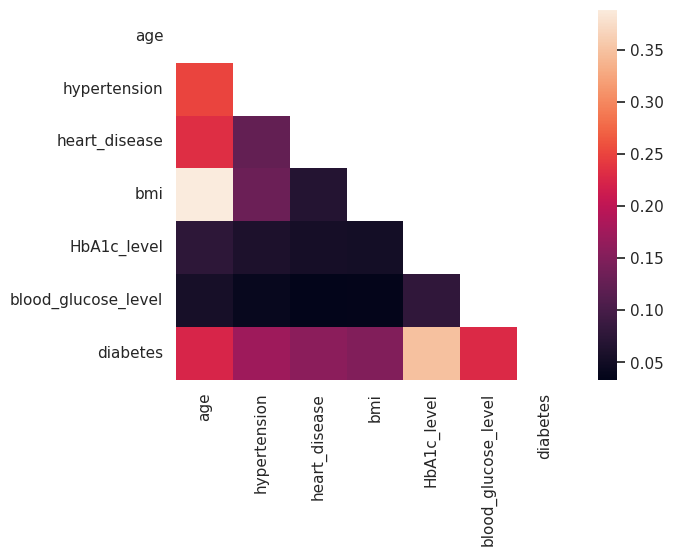

In [111]:
mask = np.triu(np.ones_like(data.corr()))
# plotting a triangle correlation heatmap
sns.heatmap(data.corr(), mask=mask)


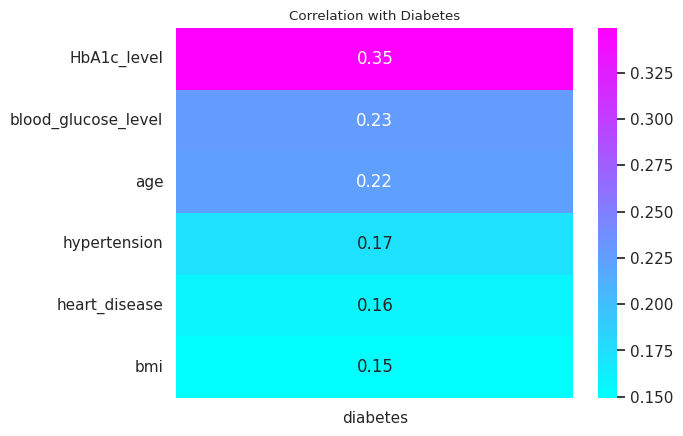

In [112]:
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="cool", annot=True, fmt='.2f')

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation with Diabetes')
plt.show()

# Preprocessing for ML Models

In [113]:
# Check the unique values of all column
n = data.nunique(axis=0)
print("No.of unique values in each column:\n", n)

No.of unique values in each column:
 gender                    2
age                     102
hypertension              2
heart_disease             2
smoking_history           3
bmi                    2380
HbA1c_level              18
blood_glucose_level      15
diabetes                  2
weight_type               4
initial_diagnosis         3
sugar_test                3
dtype: int64


In [114]:
# Move last Column to First Column
data = data.reindex(columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'weight_type',
       'initial_diagnosis', 'sugar_test', 'diabetes'])


In [115]:
data.sample(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,weight_type,initial_diagnosis,sugar_test,diabetes
28527,Female,33.0,0,0,non-smoker,27.32,6.6,130,overweight,diabetes,diabetes,0
49984,Female,54.0,0,0,past_smoker,27.32,4.5,158,overweight,normal,diabetes,0
8619,Female,51.0,0,0,non-smoker,27.32,6.1,85,overweight,prediabetes,normal,0
49323,Female,40.0,0,0,non-smoker,23.32,5.7,126,normal,prediabetes,diabetes,0


### Label Encoding

In [116]:
# Separate Numerical & Categorical columns
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
data.weight_type.value_counts()

In [ ]:
#Performing (ordinal) feature mapping
#data['weight_type'] = data['weight_type'].replace(('underweight','normal','overweight','obesity'),(1,2,3,4))

In [117]:
## Categorical (Ordinal) feature encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['weight_type_enc']=le.fit_transform(data['weight_type'])
data['initial_diagnosis_enc']=le.fit_transform(data['initial_diagnosis'])
data['sugar_test_enc']=le.fit_transform(data['sugar_test'])

In [118]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,weight_type,initial_diagnosis,sugar_test,diabetes,weight_type_enc,initial_diagnosis_enc,sugar_test_enc
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,overweight,diabetes,diabetes,0,2,0,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,overweight,diabetes,normal,0,2,0,1
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,overweight,prediabetes,diabetes,0,2,2,0
3,Female,36.0,0,0,current,23.45,5.0,155,normal,normal,diabetes,0,0,1,0
4,Male,76.0,1,1,current,20.14,4.8,155,normal,normal,diabetes,0,0,1,0


In [119]:
data['sugar_test_enc'].value_counts()

0    64824
1    19806
2     6592
Name: sugar_test_enc, dtype: int64

### Dummy Encoding

In [165]:
## Categorical (Nominal) feature e.g; 'gender', 'smoking_history'
#One hot encoding
x=pd.get_dummies(data['gender'])
data=pd.concat([data,x],axis=1)

In [166]:
#Drop object columns
df = data.drop(['gender','smoking_history','weight_type','initial_diagnosis','sugar_test'],axis=1)

In [167]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'weight_type_enc',
       'initial_diagnosis_enc', 'sugar_test_enc', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male'],
      dtype='object')

In [168]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_type_enc,initial_diagnosis_enc,sugar_test_enc,Female,Male,Female,Male,Female,Male
0,80.0,0,1,25.19,6.6,140,0,2,0,0,1,0,1,0,1,0
1,54.0,0,0,27.32,6.6,80,0,2,0,1,1,0,1,0,1,0
2,28.0,0,0,27.32,5.7,158,0,2,2,0,0,1,0,1,0,1
3,36.0,0,0,23.45,5.0,155,0,0,1,0,1,0,1,0,1,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,1,0,1


In [169]:
df.shape

(91222, 16)

In [174]:
df1= df.columns.str.lower()

## Feature selection

In [175]:
# Correlation matrix of label with features
cor = df1.cor()['diabetes'][df1.cor()['diabetes'] < 1].abs().sort_values(ascending=False)
cor

AttributeError: 'Index' object has no attribute 'cor'

*  +1.0	Perfect positive + association
*  +0.8 to 1.0	Very strong + association
*  +0.6 to 0.8	Strong + association
*  +0.4 to 0.6	Moderate + association
*  +0.2 to 0.4	Weak + association
*  0.0 to +0.2	Very weak + or no association

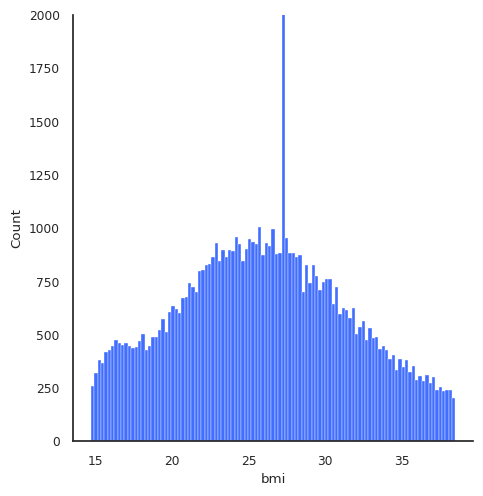

In [133]:
sns.displot(data=data, x='bmi').color = sns.color_palette()[7]
plt.ylim((0, 2000))
plt.title='BMI Histogram'

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV
# After fitting the model, we input feature names
#onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

NameError: name 'onehot_columns' is not defined

In [ ]:
#Outlier Observation Analysis
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in data:

    Q1 = data.columns.quantile(0.25)
    Q3 = data.columns.quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Pull out a specific subset of networks
used_networks = ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
       'blood_glucose_level', 'weight_type_enc', 'initial_diagnosis_enc',
       'sugar_test_enc', 'female', 'male', 'diabetes']
used_columns = (df1.columns.get_level_values("sugar_test_enc")
                          .astype(int64)
                          .isin(used_networks))

# Compute the correlation matrix and average over networks
corr_df = df1.corr().groupby(level="sugar_test_enc").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Checking label imbalance

In [136]:
# Percentage of label values
counts = df1.diabetes.value_counts()
percs = df1.diabetes.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

AttributeError: 'Index' object has no attribute 'diabetes'

The dataset is imbalanced (with 8% positive cases for diabetes and 92% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

In [ ]:
data.shape

In [ ]:
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
over

In [ ]:
under

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [ ]:
clf

In [ ]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Splitting dataset

In [ ]:
#lets extract features and label column
X=df1.drop(columns=['diabetes'])
y=df1['diabetes']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

## Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['age','bmi','blood_glucose_level']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [ ]:
X_train.describe().T

# Data Modelling

## Logistic Regression

In [ ]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

In [ ]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

## K-Nearest-Neighbour

In [ ]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

In [ ]:
#Evaluating the model
y_pred = knn.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

## Naive Bayes

In [ ]:
##Naive Bayes
#Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

In [ ]:
#Evaluating the model
y_pred = nb.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

## Decision Tree

In [ ]:
##Decision Tree
#Training the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

In [ ]:
#Evaluating the model
y_pred = tree.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

##Random Forest

In [ ]:
##Random Forest
#Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

In [ ]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

#Comparing Classification Models

In [ ]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')